# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [7]:
library(tidyverse)
library(gvlma)




-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 2.2.1     <U+221A> purrr   0.2.4
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.4
<U+221A> tidyr   0.8.0     <U+221A> stringr 1.3.0
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [8]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

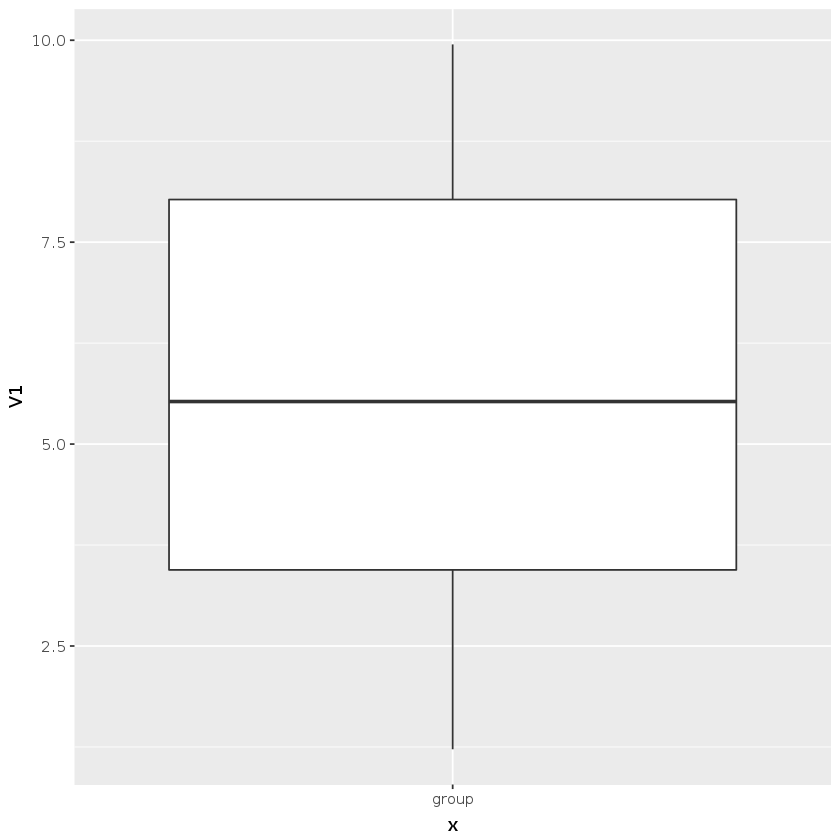

In [9]:
lo <- ggplot(df1, aes(y = V1, x = "group")) + geom_boxplot()
lo

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [10]:
reg1 <- lm(response ~ V1, data=df1)

summary(reg1)



Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [11]:
gvmodel <- gvlma(lm(response ~ V1, data = df1))


## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



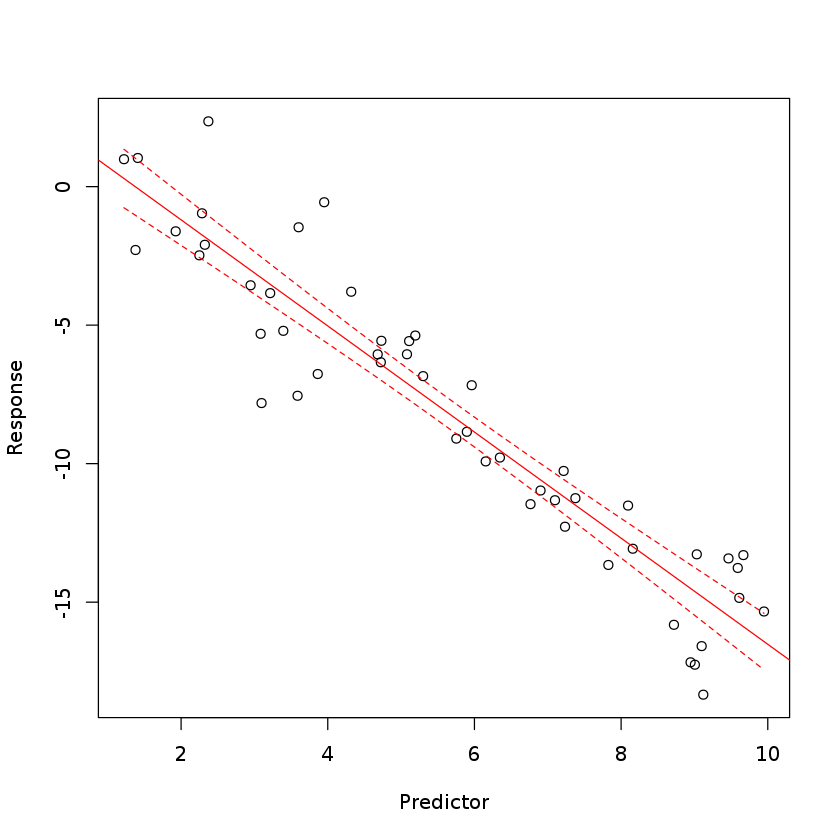

In [12]:
with(df1,plot(V1, response, xlab = "Predictor", ylab = "Response")) 
abline(reg1,col="red")
new.dat <- data.frame(df1[1])
sorted<-data.frame(V1=new.dat[order(new.dat$V1),])
predictions <- predict(reg1, newdata=sorted, interval="confidence")
lines(data.matrix(sorted), predictions[,2],col="red",lty=2)
lines(data.matrix(sorted), predictions[,3],col="red",lty=2)


# Assigment 2

# Packages

In [13]:
library(thematicmaps)
library(tidyverse)
library(stringr)


Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [14]:
map_municipal <- read.csv2("nld_municipal_map.csv")
head(map_municipal)


name,id,x,y,order,hole,piece,group
Appingedam,0,251260.527548325,594393.827234474,1,FALSE,1,0.1
Appingedam,0,251427.775868901,594486.747111725,2,FALSE,1,0.1
Appingedam,0,251668.842999999,594646.77,3,FALSE,1,0.1
Appingedam,0,251713.521000002,594770.885000002,4,FALSE,1,0.1
Appingedam,0,251354.585000001,595461.381999999,5,FALSE,1,0.1
Appingedam,0,251310.272,596022.542,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

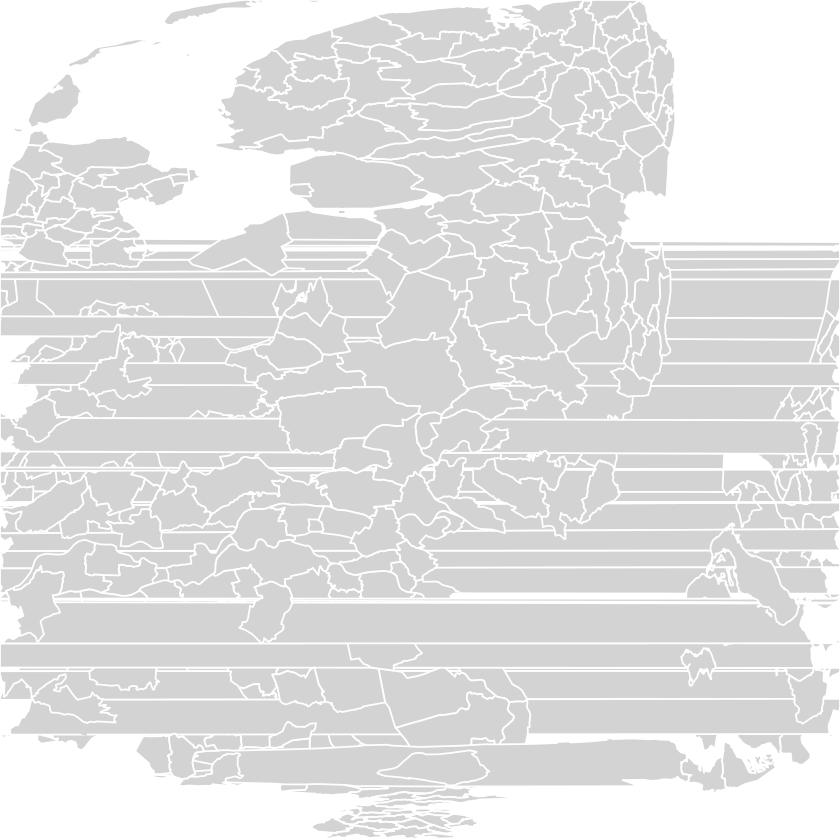

In [113]:
AddMapLayer(MapPlot(), map_municipal)

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [15]:
pc4_locations <- read.csv2("nld_pc4_locations.csv")

str(pc4_locations)


'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : Factor w/ 4066 levels "100024.115074611",..: 528 513 482 460 491 485 502 543 559 544 ...
 $ Y  : Factor w/ 4066 levels "308396.770615801",..: 2500 2509 2557 2552 2518 2497 2473 2487 2501 2529 ...


## Assignment 2d

### 2di

Read in the school data


In [16]:
schools <- read.csv2("schools.csv")

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [17]:
schools1 <- read.csv2("schools.csv") %>% mutate(PC4 = substr(POSTCODE, 0, 4))
select(schools1, PC4, DENOMINATIE)

PC4,DENOMINATIE
,Openbaar
9406,Openbaar
9401,Openbaar
9402,Openbaar
9331,Openbaar
9411,Openbaar
9461,Openbaar
9402,Openbaar
9402,Openbaar
9403,Openbaar


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [18]:
school_loc <- merge(pc4_locations,schools1,by="PC4")
filter(school_loc, DENOMINATIE %in% c("Rooms-Katholiek", "Protestants-Christelijk"))

PC4,X,Y,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
1065,116701.249852757,485645.758143566,Noord-Holland,41217,01TC,01TC00,Scholengemeenschap voor Vwo Havo Mavo Het Hervormd Lyceum,Hemsterhuisstraat,79,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1071,120223.019361821,485571.348976997,Noord-Holland,40776,02AN,02AN00,Fons Vitae Lyceum Rooms Katholiek Scholengemeenschap voor Vwo en Havo,Reijnier Vinkeleskade,53,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1077,120152.667930424,484262.785920519,Noord-Holland,41217,02AR,02AR00,Scholengemeenschap voor Athenum en Havo Het Hervormd Lyceum Zuid,Brahmsstraat,7,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1077,120152.667930424,484262.785920519,Noord-Holland,40776,14SE,14SE00,Scholengemeenschap Sint Nicolaas Lyceum voor Lyceum en Havo,Beethovenplein,2,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1081,118277.649547141,482449.52044371,Noord-Holland,41217,14VY,14VY00,Chr Sgm Buitenveldert v Gymn Ath Havo en Mavo,De Cuserstraat,3,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1132,132947.185331408,501872.965007606,Noord-Holland,72853,20GS,20GS01,Don Bosco College Atheneum Havo Vmbo Lwoo,Val van Urk,1,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1132,132947.185331408,501872.965007606,Noord-Holland,72853,20GS,20GS00,Don Bosco College Atheneum Havo Vmbo Lwoo,Heideweg,2,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1185,118214.361305473,478212.63485932,Noord-Holland,41217,02TE,02TE00,H Wesselink College Christelijke Scholengemeenschap voor Vwo Havo Mavo,Startbaan,3,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1185,118214.361305473,478212.63485932,Noord-Holland,71553,02QZ,02QZ00,Keizer Karel College Vwo Havo,Elegast,5,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1211,140459.140759105,470645.784215361,Noord-Holland,40676,00PS,00PS10,Verenigde Scholen J.A. Alberdingk Thijm Voortgezet Onderwijs,Achterom,152,...,16,Gooi en Vechtstreek,20,Gooi en Vechtstreek,24,Het Gooi en Vechtstreek,15,Zuid-Noord-Holland,20,Gooi en Vechtstreek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


End of notebook